In [21]:
# Analyze stocks holding distribution. Add up position series for each stock by date

In [22]:
# Analyze each stock's return

In [23]:
# 

In [24]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from MALongPattern import MALongPattern as MALP

In [25]:
#stock_df = pd.read_csv("sp_500_stocks.csv")
stock_list = ['AAPL', 'AMD', 'FAS', 'GE', 'JPM']

In [26]:
df_position = pd.DataFrame(columns = stock_list)
df_return = pd.DataFrame(columns = stock_list)
df_strategy = pd.DataFrame(columns = stock_list)
df_signal = pd.DataFrame(columns = stock_list)

In [27]:
def get_datas(startdate, enddate, amount, tc):
    for ticker in stock_list:
        strategy = MALP(ticker, startdate, enddate, amount, tc)
        strategy.run_strategy()
        df_position[ticker] = strategy.results['position']
        df_position.fillna(0, inplace = True)
        df_strategy[ticker] = strategy.results['strategy']
        df_return[ticker] = strategy.results['return']
        df_signal[ticker] = strategy.results['signal']

In [28]:
start = '2017-1-1'
end = '2021-4-16'
t = 0.0
amnt = 10000
get_datas(start, end, amnt, t)


c:\Users\fire_\projects\LearnQuant\MALongPattern.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][sells] = \
c:\Users\fire_\projects\LearnQuant\MALongPattern.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][sells] = 1
c:\Users\fire_\projects\LearnQuant\MALongPattern.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][sells] -= self.tc
30841.301077918433, -18139.144456388764
c:

In [29]:
df_position['total'] = df_position[stock_list].sum(axis=1)

<AxesSubplot:xlabel='Date'>

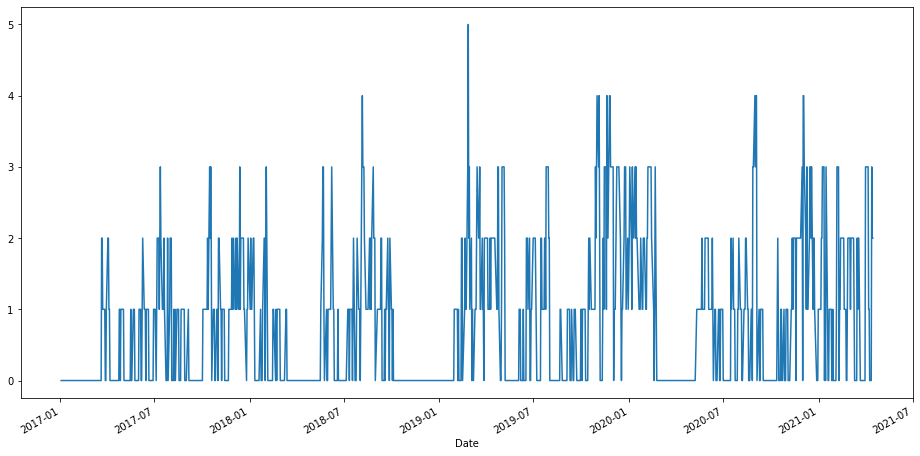

In [30]:
df_position['total'].plot(figsize=(16,8))

In [31]:
df_position[df_position['total'] == 0]

,AAPL,AMD,FAS,GE,JPM,total
Date,,,,,,
2017-01-03,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0
2017-01-05,0,0,0,0,0,0
2017-01-06,0,0,0,0,0,0
2017-01-09,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-03-29,0,0,0,0,0,0
2021-03-30,0,0,0,0,0,0
2021-03-31,0,0,0,0,0,0


In [32]:
df_position.sum(axis=0)

AAPL     212
AMD      152
FAS      218
GE       100
JPM      172
total    854
dtype: int64

In [33]:
df_position[df_position['total']>0]

,AAPL,AMD,FAS,GE,JPM,total
Date,,,,,,
2017-03-22,1,1,0,0,0,2
2017-03-23,1,1,0,0,0,2
2017-03-24,1,0,0,0,0,1
2017-03-27,1,0,0,0,0,1
2017-03-28,1,0,0,0,0,1
...,...,...,...,...,...,...
2021-04-07,0,0,0,0,1,1
2021-04-08,0,0,0,0,1,1
2021-04-13,0,0,1,1,1,3


In [34]:
def pick_a_ticker(date):
    for ticker in stock_list:
        if df_position.loc[date,ticker] == 1:
            return ticker

In [35]:
def run_strategy():
    fund_occupied = False
    # update_period = False
    for date in df_position.index:
        # if update_period:
        #     results.loc[buy_date:date, 'strategy'] = df_strategy.loc[buy_date:date, ticker]
        #     results.loc[buy_date:date, 'ticker'] = ticker
        #     update_period = False
        #     print(results.loc[buy_date:date, 'strategy'])
        #     print(ticker)
        if not fund_occupied and df_position.loc[date, 'total'] > 0:
            buy_date = date
            ticker = pick_a_ticker(date)
            fund_occupied = True
            results['signal'][date] = 1
        if fund_occupied and df_signal.loc[date,ticker] == -1:
            sell_date = date
            fund_occupied = False
            # update_period = True
            results.loc[buy_date:sell_date, 'strategy'] = df_strategy.loc[buy_date:sell_date, ticker]
            results.loc[buy_date:sell_date, 'ticker'] = ticker
            results['signal'][date] = -1
            

In [36]:
results_columns = ['ticker', 'strategy','signal']
results = pd.DataFrame(columns=results_columns, index=df_position.index)
run_strategy()

In [37]:
results['strategy'].fillna(0, inplace=True)
results

,ticker,strategy,signal
Date,,,
2017-01-03,NaN,0.00000,NaN
2017-01-04,NaN,0.00000,NaN
2017-01-05,NaN,0.00000,NaN
2017-01-06,NaN,0.00000,NaN
2017-01-09,NaN,0.00000,NaN
...,...,...,...
2021-04-09,NaN,0.00000,NaN
2021-04-12,NaN,0.00000,NaN
2021-04-13,FAS,-0.00000,-1


In [38]:
results['cstrategy'] = results['strategy'].cumsum().apply(np.exp)
results['cstrategy'][-1]

87.84042324608738

In [39]:
results['ticker'].isna().sum()

551

In [40]:
results[results['signal'] == -1].describe()

,strategy,cstrategy
count,268.000000,268.000000
mean,-0.000144,14.170704
std,0.001114,19.506657
min,-0.010418,1.011299
25%,-0.000000,2.017650
50%,-0.000000,6.495241
75%,0.000000,15.418571
max,0.000535,87.840423
